# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `8` | `Questions`

> Hi, Team. 👋

> As discussed, throughout our semester, I’ve been doing my best to pace your learning while expanding your expertise and providing a novel framework that you could deploy in real-world practices. I kept revising all the lecture materials and exercise problem-sets so they aligned with your level of understanding.

> As you will see from the class email, I have revised the current exercise questions more than usual, as I found that the submission rate for the previous exercise problem-sets was less than ideal.

> This week’s exercise questions, as always, are intended to help you integrate what you have learned in the course, rather than test you. Please do as much as you can and feel free to submit your work, so that I can capture where you stand and pace your learning more precisely. 

> The questions below aren’t difficult as they ask incremental expansion of (with logical progression of) some of the questions you solved in previous exercise problem-sets.

> Hope you find them helpful!"🤞

    NOTE: As highlighted in class, the current exercise problem-sets have been released early to ensure our discussion leaders have ample preparation time. However, for the more extensive Question 2 on Hierarchical Clustering, I'd recommend waiting and beginning your work on it after our class next Tuesday.

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf
import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

# for data split
from sklearn.model_selection import train_test_split

# for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

# for time series models
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

#for data preparation and visualization
from pandas.plotting import scatter_matrix

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler

# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
# for unsupervised learning
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

# for EDA and Data transformation
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

> Let's set some print option.

In [4]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

## 👇 <font color = "purple"> Bigger Question 1. ### 

### The first expanded question is where you will execute principal component analysis (PCA) for portfolio management.
    
    As noted in the lesson, the principal components of the correlation matrix capture 
    most of the covariation among assets in descending order and are mutually uncorrelated.
    
    Importantly, we can employ standardized principal components as portfolio weights.
    
    Randomly choose 40 stock tickers among the stock tickers from below DF.
    
> Set the seed number 627 for an identical set of stock tickers at the starting point of your analysis for everyone.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period to “the market”, 
    assess the performance of other portfolios that capture different return patterns.
    
> Please use 80% of your data for PCA and 20% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 11 years between 2009 and 2019.

In [5]:
list_of_tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

list_of_tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


### Below are the lines of code that lead to an answer:

In [6]:
df = list_of_tickers.sample(n=40, random_state=627)
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
55,AXON,Axon Enterprise,Industrials,Aerospace & Defense,"Scottsdale, Arizona",2023-05-04,1069183,1993
151,DFS,Discover Financial,Financials,Consumer Finance,"Riverwoods, Illinois",2007-07-02,1393612,1985
18,ALLE,Allegion,Industrials,Building Products,"Dublin, Ireland",2013-12-02,1579241,1908
152,DIS,Disney,Communication Services,Movies & Entertainment,"Burbank, California",1976-06-30,1744489,1923
472,VRTX,Vertex Pharmaceuticals,Health Care,Biotechnology,"Cambridge, Massachusetts",2013-09-23,875320,1989
314,MET,MetLife,Financials,Life & Health Insurance,"New York City, New York",2000-12-11,1099219,1868
76,BMY,Bristol Myers Squibb,Health Care,Pharmaceuticals,"New York City, New York",1957-03-04,14272,1989 (1887)
261,IVZ,Invesco,Financials,Asset Management & Custody Banks,"Atlanta, Georgia",2008-08-21,914208,1935
408,RCL,Royal Caribbean Group,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","Miami, Florida",2014-12-05,884887,1997
465,UHS,Universal Health Services,Health Care,Health Care Facilities,"King of Prussia, Pennsylvania",2014-09-20,352915,1979


In [7]:
symbols = df["Symbol"].tolist()

start=datetime.datetime(2009, 1, 1)
end=datetime.datetime(2019, 12, 31)

stock_data = yf.download(symbols, start, end)
stock_data = stock_data["Adj Close"]

[*********************100%%**********************]  40 of 40 completed


In [8]:
missing_values =\
(
    stock_data
    .isnull() # True (1) vs. False (0)
    .mean()
    .sort_values(ascending = False)
)

drop_list =\
(
    sorted(list(missing_values[missing_values > 0.30]
                .index)
          )
)

stock_data =\
(
    stock_data
    .drop(labels = drop_list,
          axis = 1)
)

stock_data =\
(
    stock_data
    .fillna(method = "ffill")
)

stock_data =\
(
    stock_data
    .dropna(axis = 0)
)

### <font color = red> Answer 1 is presented in the cell below: </font>

In [9]:
Daily_Linear_Return =\
(
    stock_data
    .pct_change(1)
)

# Operational defition of outliers = data points beyond 3 SD

Daily_Linear_Return =\
(
    Daily_Linear_Return[Daily_Linear_Return 
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)

scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

scaled_stock_data =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

In [10]:
prop =\
    int(len(scaled_stock_data) * 0.80)

X_Train = scaled_stock_data[    : prop] # First 80% of the data
X_Test  = scaled_stock_data[prop:     ] # Remaining 20% of the data

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

stock_tickers =\
(
 scaled_stock_data
 .columns
 .values
)

pca = PCA()

PrincipalComponent = pca.fit(X_Train)

<Axes: title={'center': 'Cumulative Explained Variance by Each PC'}>

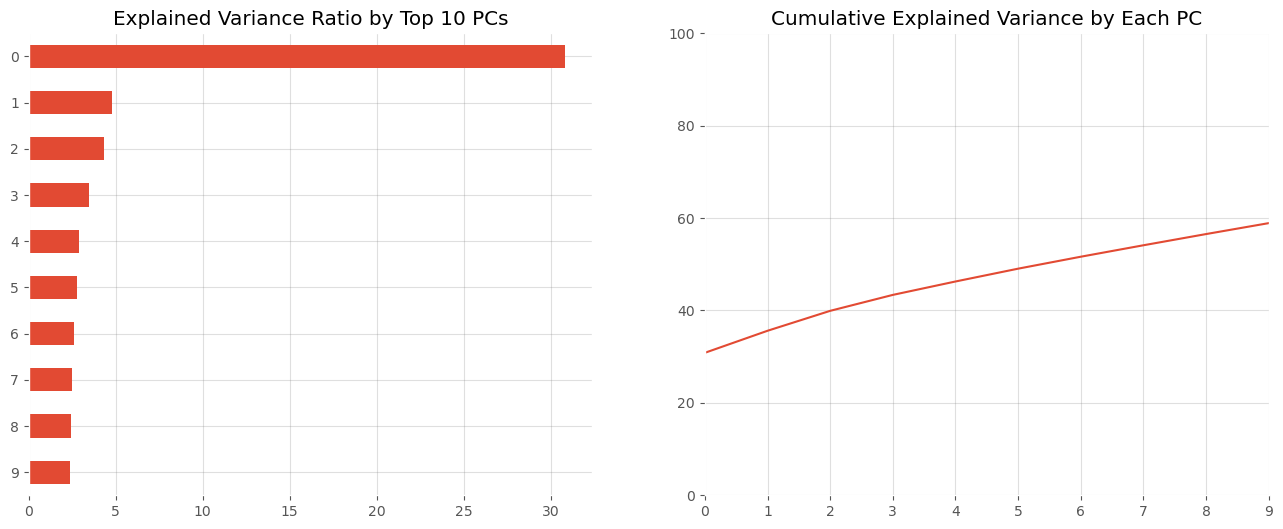

In [11]:
NumEigenValues = 10

fig, axes =\
(
    plt
    .subplots(ncols = 2,
              figsize = [16, 6]
             )
)

# Plot on the left panel

Series1 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .sort_values()
    * 100
)

# Plot on the right panel

Series2 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .cumsum()
    * 100
)

(
    Series1
    .plot
    .barh(ylim = (0, 9),
          title = "Explained Variance Ratio by Top 10 PCs",
          ax = axes[0]
         )
)

(
    Series2
    .plot(ylim = (0, 100),
          xlim = (0, 9),
          title = "Cumulative Explained Variance by Each PC",
          ax = axes[1]
         )
)

In [12]:
(
    pd
    .Series(np
           .cumsum(pca
                   .explained_variance_ratio_)
           )
    .to_frame("Explained Variance")
    .head(NumEigenValues)
    .style
    .format("{:,.2%}".format)
)

,Explained Variance
0,30.85%
1,35.61%
2,39.92%
3,43.37%
4,46.27%
5,49.05%
6,51.63%
7,54.11%
8,56.54%
9,58.90%


In [13]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights # Team, be careful with indentation

weights = PCWeights()

In [14]:
# Set the number of principal components to be considered
NumComponents = 5

# Extract the top principal components from the PCA object
# and create a DataFrame with columns named after the original features

topPortfolios =\
(
    pd
    .DataFrame(pca.components_[ : NumComponents],
               columns = stock_data.columns)
)

# Normalize the weights of the top portfolios such that the weights sum up to 1 for each portfolio
# This is done by dividing each weight by the sum of weights for the respective portfolio

eigen_portfolios =\
(
    topPortfolios
    .div(topPortfolios.sum(1),
         axis = 0)
)

# Rename the index of the eigen_portfolios DataFrame for better readability

eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)
                         ]

# Calculate the square root of the explained variance for each component
# This provides the standard deviation of returns for each eigenportfolio

np.sqrt(pca.explained_variance_)

array([3.391, 1.333, 1.268, 1.134, 1.039, 1.017, 0.982, 0.961, 0.951,
       0.939, 0.906, 0.891, 0.888, 0.867, 0.859, 0.85 , 0.835, 0.822,
       0.807, 0.794, 0.781, 0.764, 0.761, 0.75 , 0.743, 0.733, 0.712,
       0.708, 0.674, 0.672, 0.656, 0.644, 0.627, 0.614, 0.592, 0.565,
       0.469, 0.447])

In [15]:
eigen_portfolios

,AXON,BMY,CHRW,CMCSA,COO,CVS,CVX,DD,DFS,DIS,...,RCL,REGN,SHW,SNA,T,TPR,UAL,UHS,VRTX,WYNN
Portfolio 0,0.017180,0.023754,0.025543,0.028110,0.024582,0.023808,0.027711,0.029723,0.034288,0.029993,...,0.029670,0.022231,0.030547,0.033325,0.022361,0.021954,0.023929,0.025702,0.024245,0.022979
Portfolio 1,-0.506667,-0.272553,0.427349,0.219356,-0.319395,0.385289,0.818296,0.188047,0.053603,0.193904,...,-0.453591,-0.907071,-0.073907,0.076245,0.934392,-0.001386,-0.714210,-0.499794,-0.861391,-0.167055
Portfolio 2,-0.164270,0.488022,0.031010,0.170413,0.239185,0.348310,-0.443179,-0.386533,-0.143720,0.165824,...,0.110692,0.437073,0.085774,-0.112386,0.217784,-0.066454,0.177663,0.136782,0.278534,-0.245176
Portfolio 3,-0.626864,0.625191,-0.050367,0.040091,0.399433,-0.153113,0.707300,0.244012,-0.161471,-0.357687,...,-0.422954,0.911062,-0.088168,-0.287180,0.077270,-0.600852,-0.006894,0.807049,1.272261,0.056702
Portfolio 4,0.792446,0.003669,-0.437602,-0.339031,0.035428,-0.252606,0.015996,-0.043976,-0.441312,-0.262973,...,-0.305037,0.568115,0.202638,-0.151171,-0.038709,0.239344,-1.342919,-0.518978,0.330081,0.188143


array([[<Axes: title={'center': 'Portfolio 0'}>],
       [<Axes: title={'center': 'Portfolio 1'}>],
       [<Axes: title={'center': 'Portfolio 2'}>],
       [<Axes: title={'center': 'Portfolio 3'}>],
       [<Axes: title={'center': 'Portfolio 4'}>]], dtype=object)

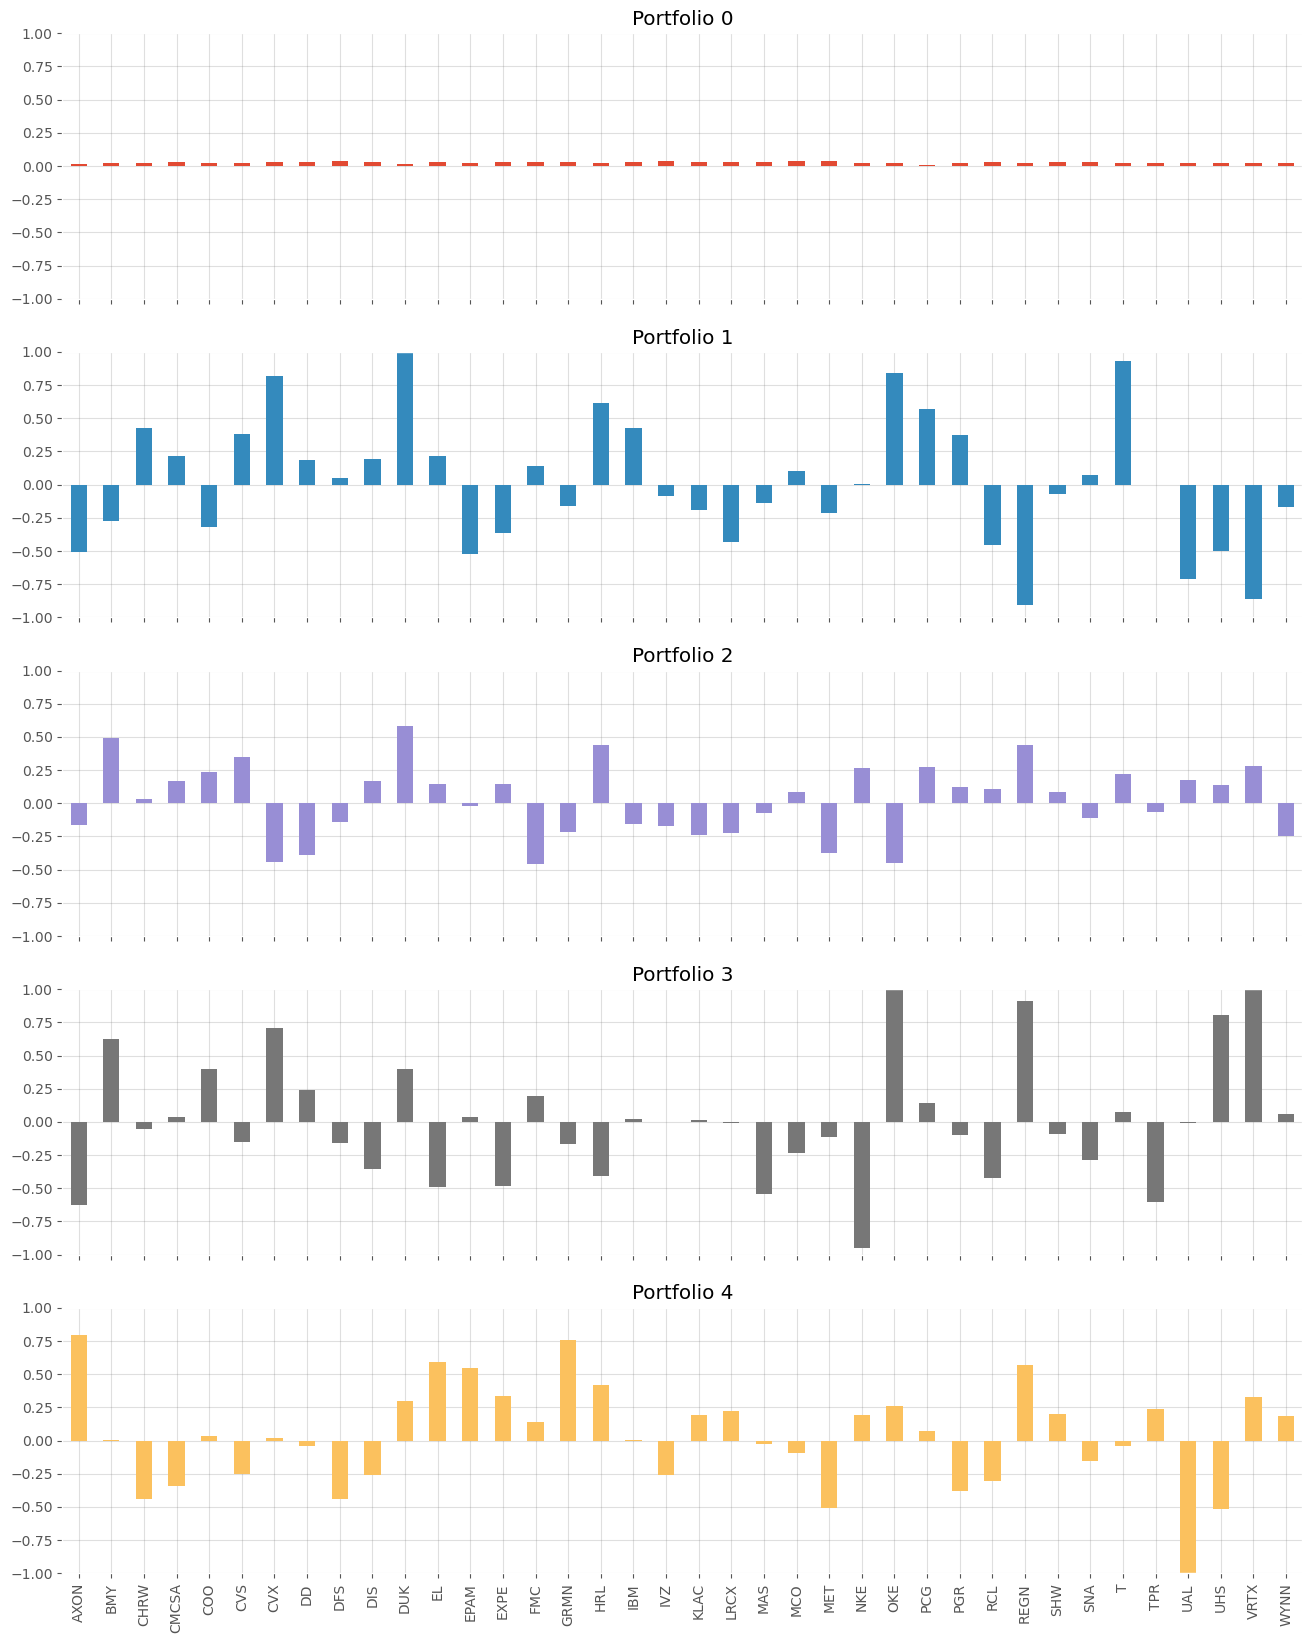

In [16]:
(
    eigen_portfolios
    .T  # Transpose the DataFrame to have portfolios as columns and assets as rows
    .plot
    .bar(subplots = True,
         layout = (int(NumComponents), 1),
         legend = False,
         sharey = True,
         figsize = [16, 20],
         ylim = [-1, 1]
        )
)

In [17]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    if annualized_sharpe > 10:
        annualized_return = 0
        annualized_vol = 0
        annualized_sharpe = 0

    return annualized_return, annualized_vol, annualized_sharpe


# Gift

def recommend_optimal_portfolio():

    # Number of eigenportfolios or principal components
    
    n_portfolios = len(pca.components_)

    # Initialize arrays for annualized return, volatility, and Sharpe ratio of each eigenportfolio
    
    annualized_ret = np.array([0.] * n_portfolios)

    sharpe_metric = np.array([0.] * n_portfolios)

    annualized_vol = np.array([0.] * n_portfolios)

    # Variable to track the index of the eigenportfolio with the highest Sharpe ratio
    
    highest_sharpe = 0

    # Extract stock tickers from the scaled data
    
    stock_tickers =\
    (scaled_stock_data
     .columns 
     .values)

    n_tickers = len(stock_tickers)

    # Extract principal components
    
    PCs = pca.components_

    # Loop through each eigenportfolio

    for i in range(n_portfolios):

        # Normalize the weights of the i-th eigenportfolio
        
        pc_w = PCs[i] / sum(PCs[i])

        # Create a DataFrame for the eigenportfolio weights
        
        eigen_prtfi =\
            (
                pd
                .DataFrame(data = {"weights": pc_w.squeeze() * 100},
                           index = stock_tickers)
            )

        # Calculate returns for the eigenportfolio
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)

        eigen_prti_returns =\
            (
                np
                .dot(X_Train_Raw.loc[ : , eigen_prtfi.index],
                     pc_w)
            )

        eigen_prti_returns =\
            (
                pd
                .Series(eigen_prti_returns.squeeze(),
                        index = X_Train_Raw.index)
            )

        # Calculate annualized return, volatility, and Sharpe ratio for the eigenportfolio
        
        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)

        # Store the metrics in their respective arrays
        
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe

        # Replace NaN values in Sharpe metric array with zeros
        
        sharpe_metric = np.nan_to_num(sharpe_metric)

    # Let's find a portfolio with the HIGHEST Sharpe Ratio

    highest_sharpe = np.argmax(sharpe_metric)

    # Print the details of the eigenportfolio with the highest Sharpe ratio
    
    print("Our Eigen Portfolio #%d with the highest Sharpe\
           \nReturn %.2f%%,\vol = %.2f%%, \nSharpe = %.2f" %
         (highest_sharpe,
          annualized_ret[highest_sharpe] * 100,
          annualized_vol[highest_sharpe] * 100,
          sharpe_metric[highest_sharpe]
         )
         )

    # Create a DataFrame to store the results for all eigenportfolios
    
    results =\
        (
            pd
            .DataFrame(data = {"Return": annualized_ret,
                               "Vol": annualized_vol,
                               "Sharpe": sharpe_metric}
                      )
        )

    results.dropna(inplace = True)

    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)

    # Print the top 10 eigenportfolios based on Sharpe ratio

    print(results.head(10)
         )

In [18]:
recommend_optimal_portfolio()

Our Eigen Portfolio #0 with the highest Sharpe           
Return 22.33%,ol = 10.92%, 
Sharpe = 2.05
      Return       Vol    Sharpe
0   0.223291  0.109168  2.045394
4   0.662359  0.572281  1.157401
10  0.742166  0.664116  1.117525
37  0.147748  0.337567  0.437684
6   0.185263  0.585314  0.316518
34  0.348623  1.362175  0.255931
9   0.056370  0.311506  0.180960
2   0.058623  0.339005  0.172928
36  0.139966  0.912327  0.153416
26  0.197890  2.036892  0.097153


In [19]:
def FindPortfolioVisual():
    
    n_portfolios = len(pca.components_)
    
    annualized_ret = np.array([0.] * n_portfolios)
    
    sharpe_metric = np.array([0.] * n_portfolios)
    
    annualized_vol = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    
    stock_tickers = scaled_stock_data.columns.values
    
    n_tickers = len(stock_tickers)
    
    PCs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = PCs[i] / sum(PCs[i]
                           )
        
        eigen_prtfi = pd.DataFrame(data = {"weights": pc_w.squeeze()*100}, 
                                   index = stock_tickers)
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)
        
        eigen_prti_returns = np.dot(X_Train_Raw.loc[:, eigen_prtfi.index], 
                                    pc_w)
        
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),
                                       index = X_Train_Raw.index)
        
        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)
        
        annualized_ret[i] = er
        
        annualized_vol[i] = vol
        
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    # HOW TO FIND A PORTFOLIO with the HIGHEST Sharpe Ratio
    
    highest_sharpe = np.argmax(sharpe_metric)
    
    print("Our Eigen Portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]
          )
         )
        
    #####
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(16, 6)
    
    ax.plot(sharpe_metric, 
            linewidth = 2)
    
    ax.set_title("Sharpe Ratio of Eigen-Portfolios")
    
    ax.set_ylabel("Sharpe Ratio")
    
    ax.set_xlabel("Portfolios")
    
    #####
        
    results = pd.DataFrame(data = {"Return": annualized_ret, "Vol": annualized_vol, "Sharpe": sharpe_metric}
                           )
    
    results.dropna(inplace = True)
    
    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)
    
    print(results.head(15)
         )
    
    plt.show()

Our Eigen Portfolio #0 with the highest Sharpe. Return 22.33%, vol = 10.92%, Sharpe = 2.05
      Return        Vol    Sharpe
0   0.223291   0.109168  2.045394
4   0.662359   0.572281  1.157401
10  0.742166   0.664116  1.117525
37  0.147748   0.337567  0.437684
6   0.185263   0.585314  0.316518
34  0.348623   1.362175  0.255931
9   0.056370   0.311506  0.180960
2   0.058623   0.339005  0.172928
36  0.139966   0.912327  0.153416
26  0.197890   2.036892  0.097153
20  0.000000   0.000000  0.000000
12 -0.104153   1.838707 -0.056645
24 -1.000000  16.023345 -0.062409
32 -1.000000   8.547334 -0.116996
29 -1.000000   6.989406 -0.143074


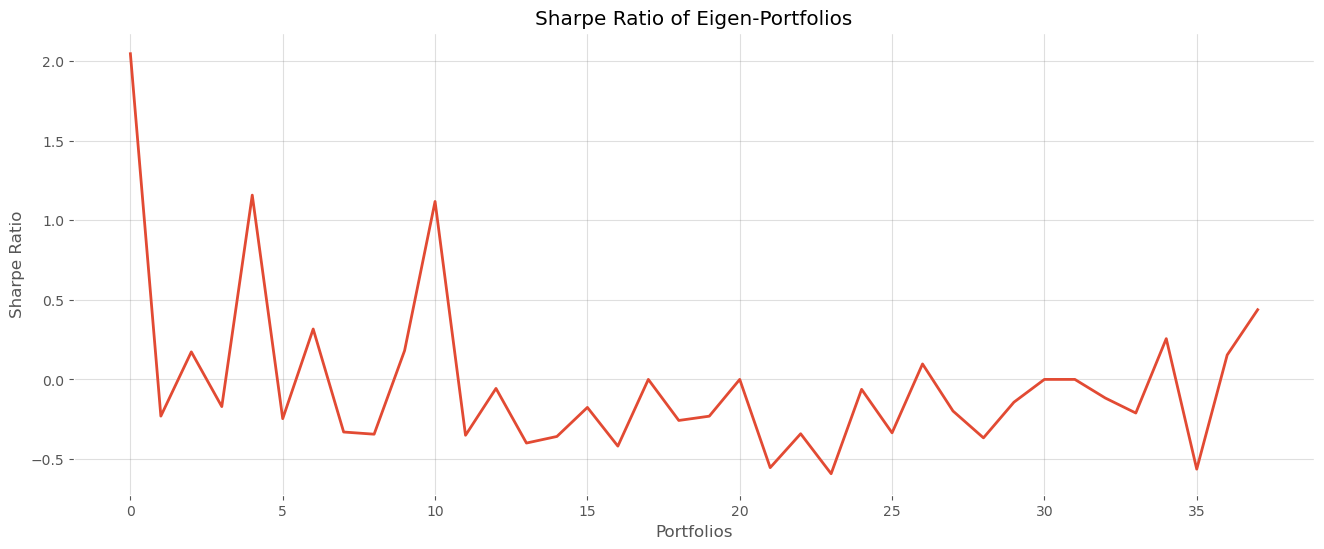

In [20]:
FindPortfolioVisual()

In [21]:
# Yet another gift

def backtest_PCA_porfolios(eigen):

    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    eigen_prtfi.sort_values(by = ["weights"],
                            ascending = False,
                            inplace = True)

    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw
             .loc[ : , eigen_prtfi.index],
             eigen)
    )

    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )
 
    plt.show()

Our PCA-based Portfolio:
Return = 27.95%
Volatility = 68.24%
Sharpe = 0.41


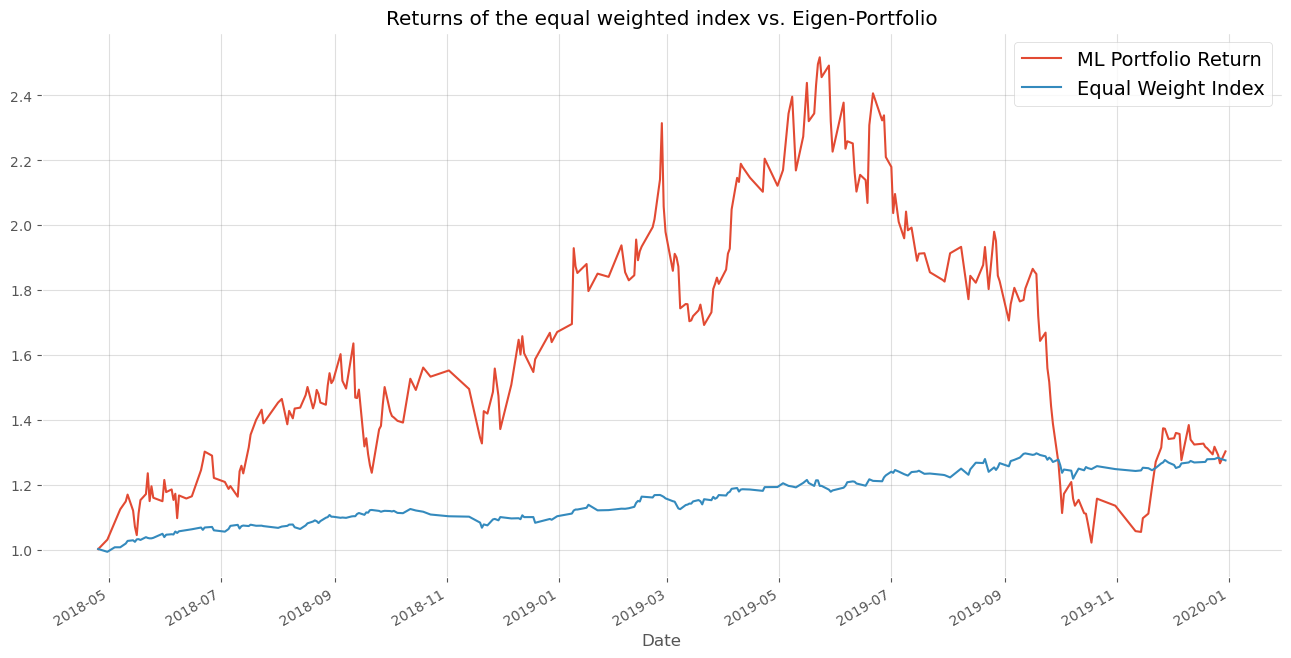

In [22]:
backtest_PCA_porfolios(eigen = weights[3]
                      )

Our PCA-based Portfolio:
Return = 17.67%
Volatility = 63.98%
Sharpe = 0.28


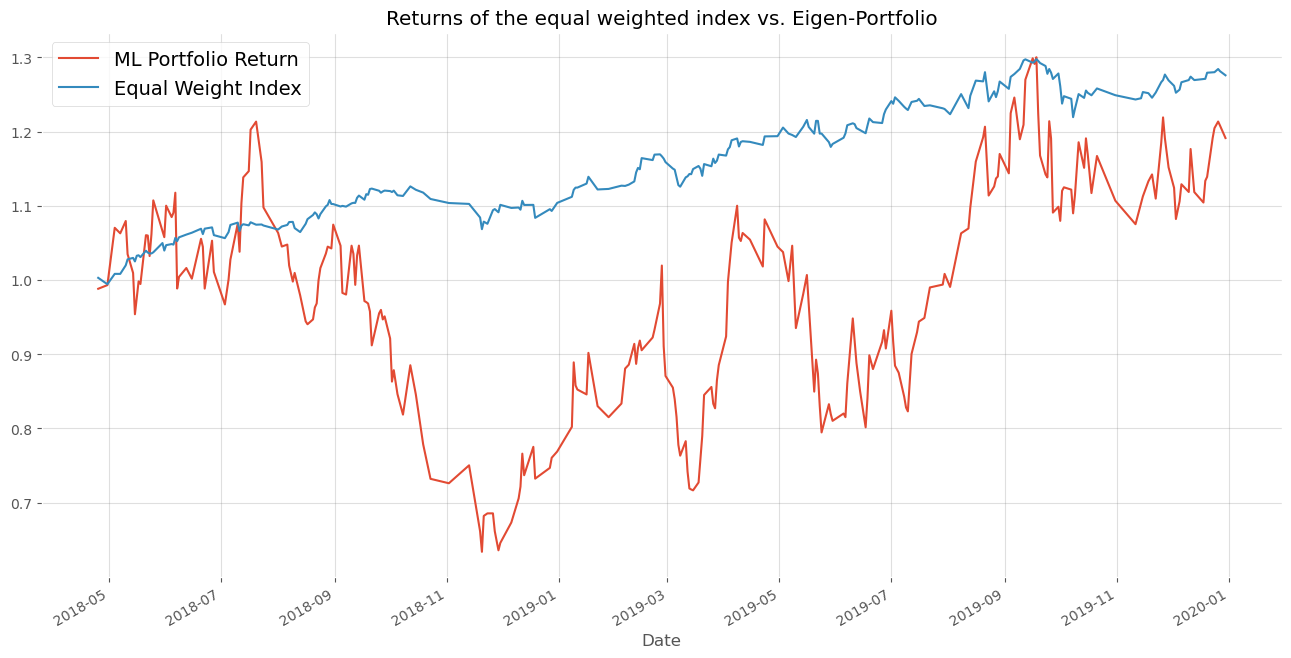

In [23]:
backtest_PCA_porfolios(eigen = weights[4]
                      )

In [24]:
weights[0]

array([0.017, 0.024, 0.026, 0.028, 0.025, 0.024, 0.028, 0.03 , 0.034,
       0.03 , 0.013, 0.028, 0.023, 0.028, 0.03 , 0.029, 0.023, 0.029,
       0.036, 0.029, 0.029, 0.033, 0.034, 0.034, 0.025, 0.021, 0.007,
       0.026, 0.03 , 0.022, 0.031, 0.033, 0.022, 0.022, 0.024, 0.026,
       0.024, 0.023])

## 👇 <font color = "purple"> Bigger Question 2. The next question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).

> The primary advantage AGNES has over other clustering methods is that you don’t need to guess how many clusters there might be.
    
> Agglomerate Clustering first assigns each data point into its own cluster, and gradually merges clusters until only one remains. It’s then up to a quant to choose a cut-off threshold and decide how many clusters are present.

> Linkage does the actual clustering in one line of code, and returns a list of the clusters.

> There are different options for measuring the distance. We will choose the average distance measurement option, but others are possible (ward, single, centroid, etc.).

### The best way to visualize an agglomerate clustering algorithm is through a dendrogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. 
    
### The distance between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.
    
### <font color = green> Using Dow data, based on what you learned in class, run the above analysis and come up with a dendrogram. According to the dendrogram, which of the stocks are most correlated? Also based on the dendrogram, please identify two stocks that are not well correlated.

### Below are the lines of code that lead to an answer:

In [25]:
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [26]:
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.ticker as ticker
from itertools import cycle

In [27]:
dow =\
(
    pd
    .read_csv("https://talktoroh.squarespace.com/s/dow_pca-hemx.csv",
              index_col = 0)
)
stock_data = dow

missing_fractions = \
    stock_data \
    .isnull() \
    .mean() \
    .sort_values(ascending = False)

drop_list =\
    sorted(list(missing_fractions
                [missing_fractions > 0.3]
                .index)
           )

stock_data =\
    stock_data \
    .drop(labels= drop_list, 
          axis=1)

In [28]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns =\
(
    stock_data
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

returns["Volatility"] =\
(    
     stock_data
    .pct_change()
    .std() 
    * np.sqrt(252)
)

data = returns
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [29]:
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(returns),columns = returns.columns, index = returns.index)
X = rescaledDataset

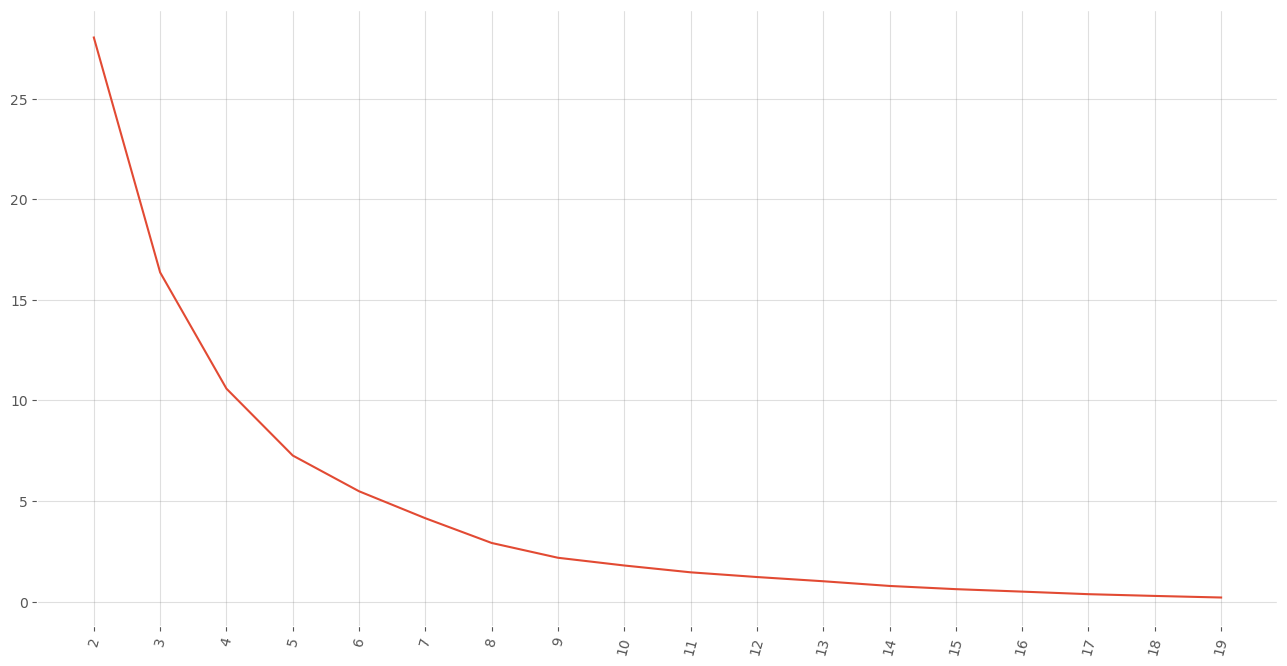

In [30]:
distorsions = []

max_loop = 20

for k in range(2, max_loop):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(16, 8))

plt.plot(range(2, max_loop), distorsions)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

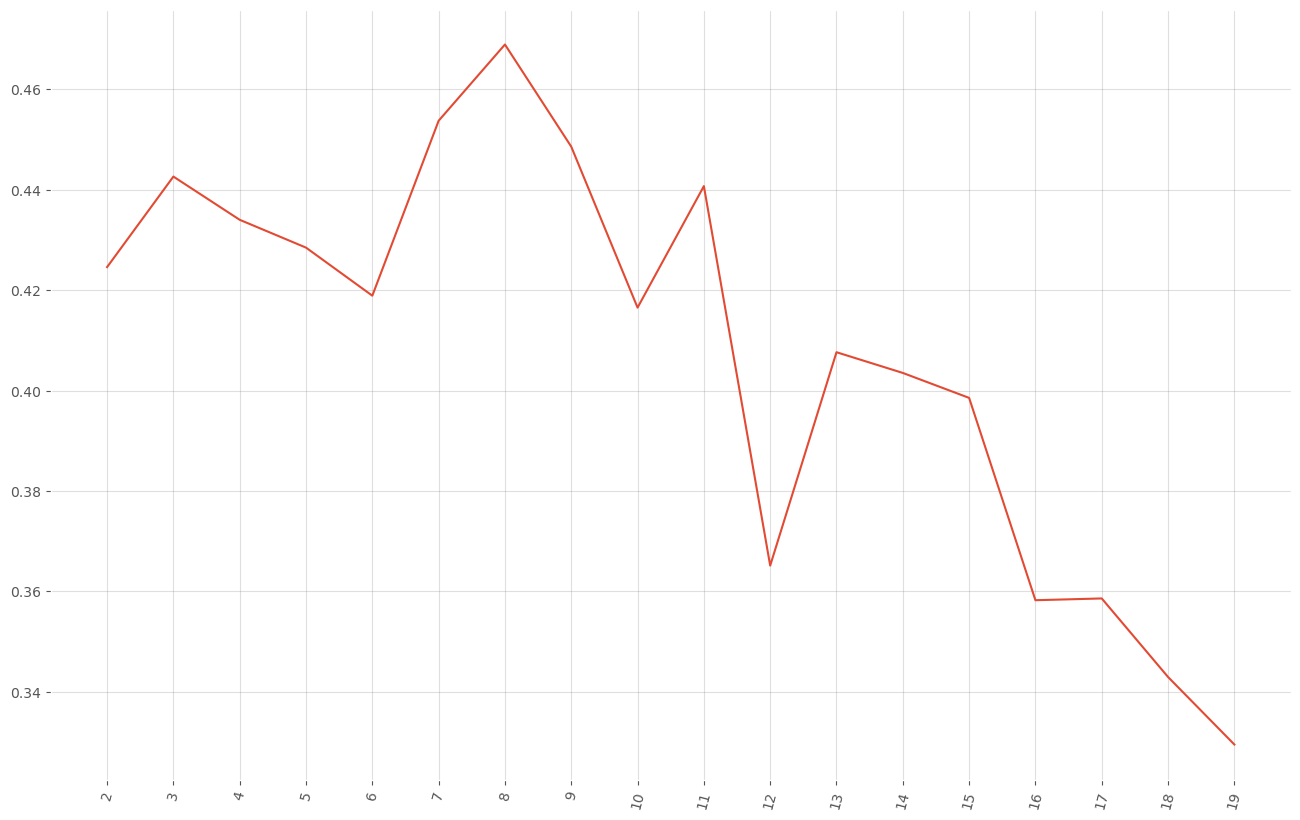

In [31]:
silhouette_score = []

for k in range(2, max_loop):
        kmeans = KMeans(n_clusters = k,  
                        random_state = 10, 
                        n_init = 10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10)
                               )
        
fig = plt.figure(figsize=(16, 10)
                )

plt.plot(range(2, max_loop), silhouette_score)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

### <font color = red> Answer 2 is presented in the cell below: </font>

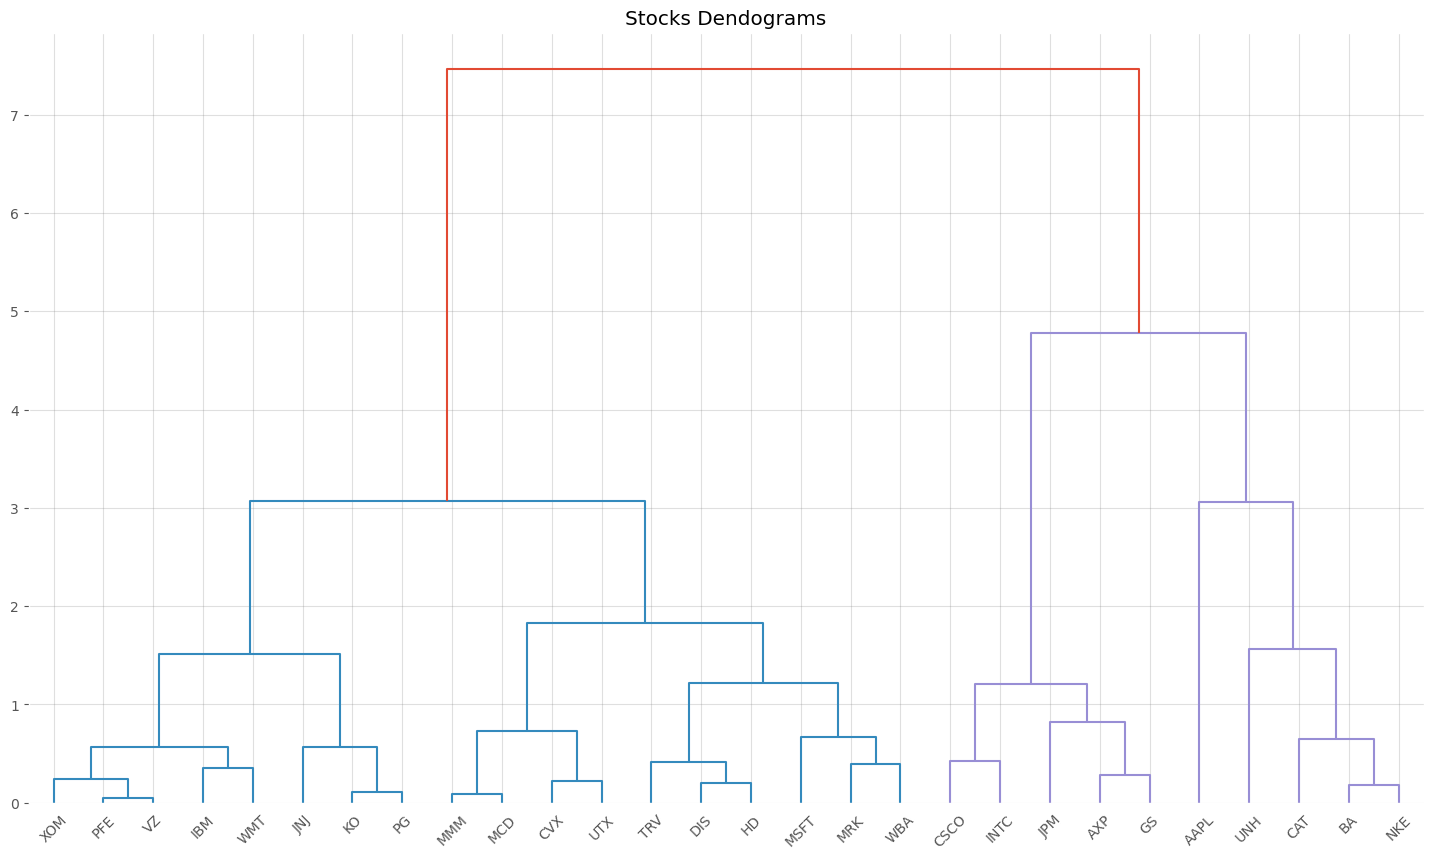

In [32]:
#Calulate linkage
Z = linkage(X, 
            method = "ward")

# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()



## <font color = blue> 👉 Questions 3 to 7 ask you to build, execute, and backtest a strategy, using both `MACD` and `RSI`. </font>

### <font color = green> Please combine the RSI and MACD strategies and own the stock if both RSI and MACD criteria provide a signal to buy. As to RSI, you will generalize the RSI threshold values to 50.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Microsoft (`MSFT`) is our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position under a condition where RSI is below 50 and, at the same time, bullish crossover based on MACD is accomplished.
<br>
    
- Enter a short position under a condition where RSI is above 50 and, at the same time, bearish crossover based on MACD is accomplished.

### <font color = green> NOTE: The MACD crossover strategy is defined as:    
    
- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.        
<br>

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.
    
### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period 
    and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and 
    each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for 
    the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value 
    to calculate the nextaverage value by multiplying by our lookback 
    period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value 
    (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [33]:
stock = ["MSFT"]
start=datetime.datetime(2015, 1, 1)
end=datetime.datetime(2017, 12, 31)

In [34]:
stock_data = yf.download(stock, start, end)

# Calculate the 12-day and 26-day exponential moving averages
stock_data["12day"] = stock_data["Adj Close"].ewm(span=12, min_periods=12).mean()
stock_data["26day"] = stock_data["Adj Close"].ewm(span=26, min_periods=26).mean()

# Calculate the MACD line
stock_data["MACD"] = stock_data["12day"] - stock_data["26day"]

# Calculate the 9-day exponential moving average of the MACD line (Signal Line)
stock_data["Signal_Line"] = stock_data["MACD"].ewm(span=9, min_periods=9).mean()

# Generate buy/sell signals based on MACD and Signal Line
stock_data["MACDSignal"] = np.where(stock_data["MACD"] > stock_data["Signal_Line"], 1, -1)

[*********************100%%**********************]  1 of 1 completed


In [35]:
# Calculate RSI

stock_data["diff"] = stock_data["Adj Close"].diff()

stock_data["gain"] = np.where(stock_data["diff"] > 0, stock_data["diff"], 0)
stock_data["loss"] = np.where(stock_data["diff"] < 0, -stock_data["diff"], 0)
stock_data["gain_av"] = stock_data["gain"].rolling(window=14).mean()
stock_data["loss_av"] = stock_data["loss"].rolling(window=14).mean()

stock_data["RS"] = stock_data["gain_av"] / stock_data["loss_av"]

stock_data["RSI"] = 100 - (100 / (1 + stock_data["RS"]))

stock_data["position"] = np.nan

long = (stock_data["RSI"].shift(1) < 50) & (stock_data["RSI"] >= 50) & (stock_data["position"].shift(1) != -1)
short = (stock_data["RSI"].shift(1) > 50) & (stock_data["RSI"] <= 50) & (stock_data["position"].shift(1) != -1)

stock_data["position"] = np.where(long, 1, stock_data["position"])
stock_data["position"] = np.where(short, -1, stock_data["position"])
stock_data["position"].ffill(inplace=True)


In [36]:
stock_data["position"].value_counts()

position
 1.0    482
-1.0    257
Name: count, dtype: int64

In [37]:
stock_data["Signal"] = 0

stock_data.loc[(stock_data["position"] == 1) & (stock_data["MACDSignal"] == 1), "Signal"] = 1
stock_data.loc[(stock_data["position"] == -1) & (stock_data["MACDSignal"] == -1), "Signal"] = -1
stock_data["Signal"].fillna(0, inplace=True)


In [38]:
stock_data["Signal"].value_counts()

Signal
 1    322
-1    227
 0    206
Name: count, dtype: int64

In [39]:
def MACD_strategy(stock_data, start_date, end_date):

    stock_data = yf.download(stock_data, start=start_date, end=end_date)

    # Calculate the 12-day and 26-day exponential moving averages
    stock_data["12day"] = stock_data["Adj Close"].ewm(span=12, min_periods=12).mean()
    stock_data["26day"] = stock_data["Adj Close"].ewm(span=26, min_periods=26).mean()

    # Calculate the MACD line
    stock_data["MACD"] = stock_data["12day"] - stock_data["26day"]

    # Calculate the 9-day exponential moving average of the MACD line (Signal Line)
    stock_data["Signal_Line"] = stock_data["MACD"].ewm(span=9, min_periods=9).mean()

    # Generate buy/sell signals based on MACD and Signal Line
    stock_data["MACDSignal"] = np.where(stock_data["MACD"] > stock_data["Signal_Line"], 1, -1)

    # Calculate RSI

    stock_data["diff"] = stock_data["Adj Close"].diff()

    stock_data["gain"] = np.where(stock_data["diff"] > 0, stock_data["diff"], 0)
    stock_data["loss"] = np.where(stock_data["diff"] < 0, -stock_data["diff"], 0)
    stock_data["gain_av"] = stock_data["gain"].rolling(window=14).mean()
    stock_data["loss_av"] = stock_data["loss"].rolling(window=14).mean()

    stock_data["RS"] = stock_data["gain_av"] / stock_data["loss_av"]

    stock_data["RSI"] = 100 - (100 / (1 + stock_data["RS"]))

    stock_data["position"] = np.nan

    long = (stock_data["RSI"].shift(1) < 50) & (stock_data["RSI"] >= 50) & (stock_data["position"].shift(1) != -1)
    short = (stock_data["RSI"].shift(1) > 50) & (stock_data["RSI"] <= 50) & (stock_data["position"].shift(1) != -1)

    stock_data["position"] = np.where(long, 1, stock_data["position"])
    stock_data["position"] = np.where(short, -1, stock_data["position"])
    stock_data["position"].ffill(inplace=True)

    stock_data.loc[(stock_data["position"] == 1) & (stock_data["MACDSignal"] == 1), "Signal"] = 1
    stock_data.loc[(stock_data["position"] == -1) & (stock_data["MACDSignal"] == -1), "Signal"] = -1
    stock_data["Signal"].fillna(0, inplace=True)

    # Signal Marker
    stock_data["mSignal"] = stock_data["Signal"].diff()

    # Calculate log returns
    stock_data["log_returns"] = np.log(stock_data["Adj Close"] / stock_data["Adj Close"].shift(1))

    # Calculate Strategy returns
    stock_data["strategy_returns"] = stock_data["Signal"].shift(1) * stock_data["log_returns"]

    # Calculate cumulative returns
    stock_data["cumulative_returns"] = stock_data["log_returns"].dropna().cumsum().apply(np.exp)

    # Calculate cumulative strategy returns
    stock_data["cumulative_strategy_returns"] = stock_data["strategy_returns"].dropna().cumsum().apply(np.exp)

    # Calculate Max Gross Performance
    stock_data["max_gross_performance"] = stock_data["cumulative_returns"].cummax()

    # Calculate Max Gross Strategy Performance
    stock_data["max_gross_strategy_performance"] = stock_data["cumulative_strategy_returns"].cummax()

    # Drop rows with NaN values
    stock_data = stock_data.dropna()

    return stock_data

In [40]:
def plot_signals_for_MACD(stock_data):

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the MACD
    ax.plot(stock_data.index, stock_data['MACD'], label='MACD')

    # Plot the Signal Line
    ax.plot(stock_data.index, stock_data['Signal_Line'], label='Signal Line')

    # Plot buy signals (green triangles)
    ax.plot(
        stock_data.loc[stock_data.mSignal == 2.0].index,
        stock_data[stock_data.mSignal == 2.0]['MACD'],
        "^",
        color="green",
        markersize=12,
        label="Buy Signal",
    )

    # Plot sell signals (red triangles)
    ax.plot(
        stock_data.loc[stock_data.mSignal == -2.0].index,
        stock_data[stock_data.mSignal == -2.0]['MACD'],
        "v",
        color="red",
        markersize=12,
        label="Sell Signal",
    )

    # Set labels and title for the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('MACD Buy and Sell Signals')

    # Add a legend to the plot
    ax.legend()

    # Show the plot
    plt.show()

### <font color = red> Answer 3 is presented in the cell below: </font>

In [41]:
MACD = MACD_strategy(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


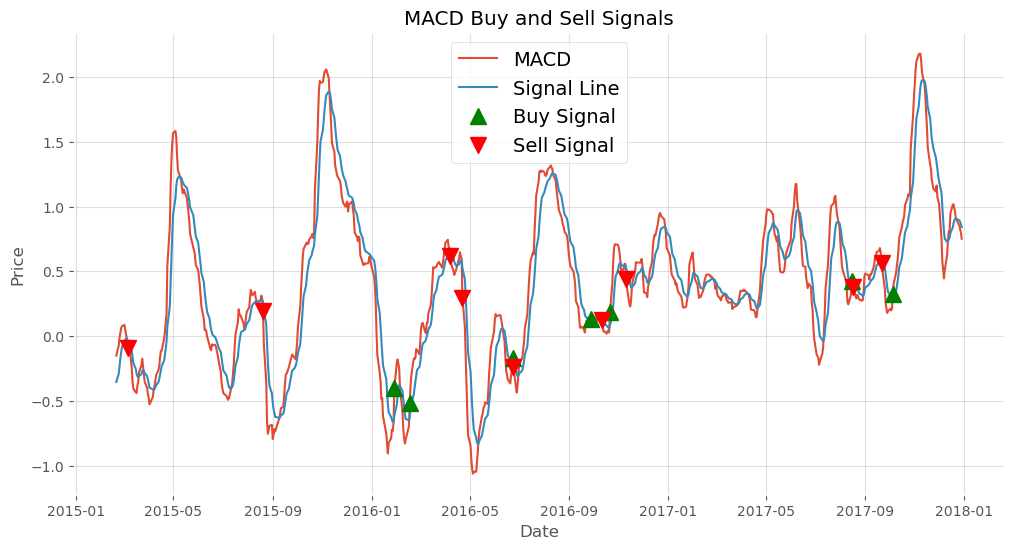

In [42]:
plot_signals_for_MACD(MACD)

### <font color = blue> 👉 Question 4</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

In [43]:
def plot_cumulative_returns(stock_data_df):
    # Calculate cumulative log returns and strategy returns
    cumulative_returns = stock_data_df[["cumulative_returns", "cumulative_strategy_returns"]]

    # Create the figure and subplot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the cumulative returns
    cumulative_returns.plot(ax=ax, lw=1.5)
    ax.set_title("Cumulative Returns")
    ax.set_ylabel("Cumulative Returns")
    ax.legend(["Returns", "Strategy Returns"])

    plt.tight_layout()
    plt.show()

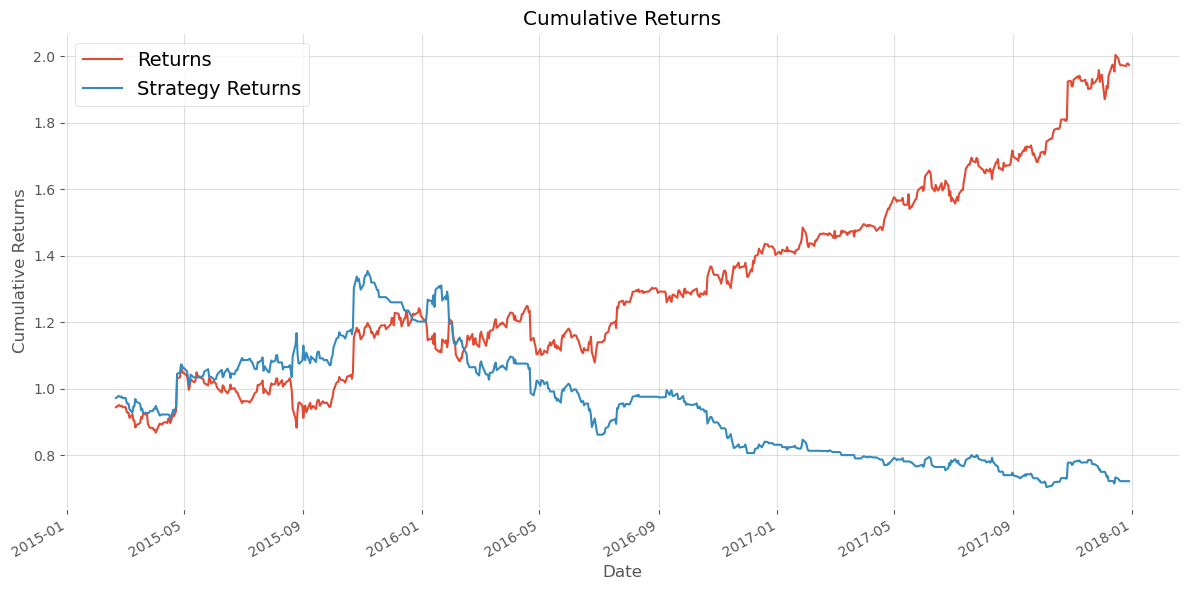

In [44]:
plot_cumulative_returns(MACD)

In [45]:
MACD["cumulative_strategy_returns"] - 1

Date
2015-02-20   -0.028028
2015-02-23   -0.021601
2015-02-24   -0.022931
2015-02-25   -0.025147
2015-02-26   -0.023595
                ...   
2017-12-22   -0.277892
2017-12-26   -0.277892
2017-12-27   -0.277892
2017-12-28   -0.277892
2017-12-29   -0.277892
Name: cumulative_strategy_returns, Length: 722, dtype: float64

### <font color = red> Answer 4 </font>

    The answer is ____-27.7________ % .

### <font color = blue> 👉 Question 5</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [46]:
def calculate_drawdown_periods(stock_data_df):
    # Extract date and return data
    dates = stock_data_df.index
    returns = stock_data_df["cumulative_strategy_returns"]

    # Create a DataFrame with date and return columns
    df = pd.DataFrame({'Date': dates, 'returns': returns})

    # Calculate maximum returns and drawdown
    df["MAX_returns"] = df["returns"].cummax()
    drawdown = (df["returns"] / df["MAX_returns"]) - 1
    df["drawdown"] = drawdown

    drawdowns = []
    drawdown_periods = []
    start_date = None
    dd = 0

    for date, i in zip(df['Date'], df["drawdown"]):
        if i < 0:
            if start_date is None:
                start_date = date
                # Check for Monday
                if start_date.weekday() == 0:
                    start_date = start_date - datetime.timedelta(days=3)
                else:
                    start_date = start_date - datetime.timedelta(days=1)
            if i < dd:
                dd = i
        elif i == 0:
            if start_date is not None:
                end_date = date
                drawdown_periods.append((end_date - start_date).days)
                drawdowns.append(dd)
                start_date = None
                dd = 0

    if start_date is not None:
        end_date = df['Date'].iloc[-1]
        drawdown_periods.append((end_date - start_date).days)
        drawdowns.append(dd)

    # Store drawdown periods and values
    drawdown_data = dict(zip(drawdown_periods, drawdowns))

    return drawdown_data

In [47]:
calculate_drawdown_periods(MACD)

{60: -0.07126590836181046,
 62: -0.058584347589583086,
 21: -0.030522651285577407,
 14: -0.041031986467991,
 19: -0.06037921607898333,
 44: -0.08252106335373421,
 8: -0.016227822297342875,
 2: -0.0003673801907714269,
 9: -0.029677179731036007,
 784: -0.47961164213438034}

In [48]:
sorted(calculate_drawdown_periods(MACD))

[2, 8, 9, 14, 19, 21, 44, 60, 62, 784]

### <font color = red> Answer 5 </font>

    The Worst drawdown period     : Net drawdown _____47.96_______ % | Duration _____784_______ Days
    
    The 2nd worst drawdown period : Net drawdown ______5.8______ % | Duration ____62________ Days
     
    The 3rd worst drawdown period : Net drawdown ______7.1______ % | Duration _____60_______ Days
         
    The 4th worst drawdown period : Net drawdown _____8.25_______ % | Duration _______44_____ Days
    
    The 5th worst drawdown period : Net drawdown _______3.05_____ % | Duration _______21_____ Days

### <font color = blue> 👉 Question 6</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [49]:
def annual_returns_sort(stock_data):
    stock_data['year'] = stock_data.index.year
 
    last= stock_data.groupby('year')[['cumulative_strategy_returns']].last()
    
    #The column value is initialized to NaN 
    last['year_returns'] = np.nan
    
    #run a for loop here for calculating the annual return of each year. 
    for i in range(len(last)):
        if i == 0:
            last['year_returns'].iloc[i] = (last['cumulative_strategy_returns'].iloc[i]/1-1)*100
        else:
            last['year_returns'].iloc[i] = \
                (last['cumulative_strategy_returns'].iloc[i] / last['cumulative_strategy_returns'].iloc[i - 1] - 1)*100
    
    average_annual_returns = last['year_returns'].mean()
    low_returns_years = last[last['year_returns'] < average_annual_returns]
    high_returns_years = last[last['year_returns'] > average_annual_returns]
        
    print(f"average annual returns is {average_annual_returns}")
    print(low_returns_years)
    print(high_returns_years)

In [50]:
annual_returns_sort(MACD)

average annual returns is -7.926476139426309
      cumulative_strategy_returns  year_returns
year                                           
2016                     0.831604    -30.818154
2017                     0.722108    -13.166822
      cumulative_strategy_returns  year_returns
year                                           
2015                     1.202055     20.205548


### <font color = red> Answer 6 </font>

    Below average year(s) : ______2016,2017______ 
    
    Above average year(s) : _____2015_______ 
     

###  <font color = blue> 👉 Question 7. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [51]:
def calculate_annual_sharpe_ratio(returns_data):
    annualized_sharpe =\
    (
        np.sqrt(253) * (returns_data['cumulative_strategy_returns'] / returns_data['cumulative_strategy_returns'].shift(1)-1).mean()\
                    / (returns_data['cumulative_strategy_returns'] / returns_data['cumulative_strategy_returns'].shift(1)-1).std()
    )

    return annualized_sharpe

calculate_annual_sharpe_ratio(MACD)

-0.4150623549284692

### <font color = red> Answer 7 </font>
    
    Sharpe ratio: _____-0.415_____
    

###  <font color = blue> 👉 Question 8. </font> Please compare the above Sharpe ratio deploying RSI-MACD combined strategy, relative to the Sharpe ratio utilizing MACD strategy only. Which investment strategy performs better based on the Sharpe ratio?

### Below are the lines of code that lead to an answer:

In [52]:
def MACD_strategy(stock_data, start_date, end_date):

    stock_data = yf.download(stock_data, start=start_date, end=end_date)

    # Calculate the 12-day and 26-day exponential moving averages
    stock_data["12day"] = stock_data["Adj Close"].ewm(span=12, min_periods=12).mean()
    stock_data["26day"] = stock_data["Adj Close"].ewm(span=26, min_periods=26).mean()

    # Calculate the MACD line
    stock_data["MACD"] = stock_data["12day"] - stock_data["26day"]

    # Calculate the 9-day exponential moving average of the MACD line (Signal Line)
    stock_data["Signal_Line"] = stock_data["MACD"].ewm(span=9, min_periods=9).mean()

    # Generate buy/sell signals based on MACD and Signal Line
    stock_data["Signal"] = np.where(stock_data["MACD"] > stock_data["Signal_Line"], 1, 0)

    # Signal Marker
    stock_data["mSignal"] = stock_data["Signal"].diff()

    # Calculate log returns
    stock_data["log_returns"] = np.log(stock_data["Adj Close"] / stock_data["Adj Close"].shift(1))

    # Calculate Strategy returns
    stock_data["strategy_returns"] = stock_data["Signal"].shift(1) * stock_data["log_returns"]

    # Calculate cumulative returns
    stock_data["cumulative_returns"] = stock_data["log_returns"].dropna().cumsum().apply(np.exp)

    # Calculate cumulative strategy returns
    stock_data["cumulative_strategy_returns"] = stock_data["strategy_returns"].dropna().cumsum().apply(np.exp)

    # Calculate Max Gross Performance
    stock_data["max_gross_performance"] = stock_data["cumulative_returns"].cummax()

    # Calculate Max Gross Strategy Performance
    stock_data["max_gross_strategy_performance"] = stock_data["cumulative_strategy_returns"].cummax()

    # Drop rows with NaN values
    stock_data = stock_data.dropna()

    return stock_data


In [53]:
MACD = MACD_strategy(stock, start, end)
calculate_annual_sharpe_ratio(MACD)

[*********************100%%**********************]  1 of 1 completed


0.6051578306275459

### <font color = red> Answer 8 </font>
    
    _____________only MACD_____________ strategy performs better.
    

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊